In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

C:\Users\mbkhn\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.shape

(16598, 11)

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


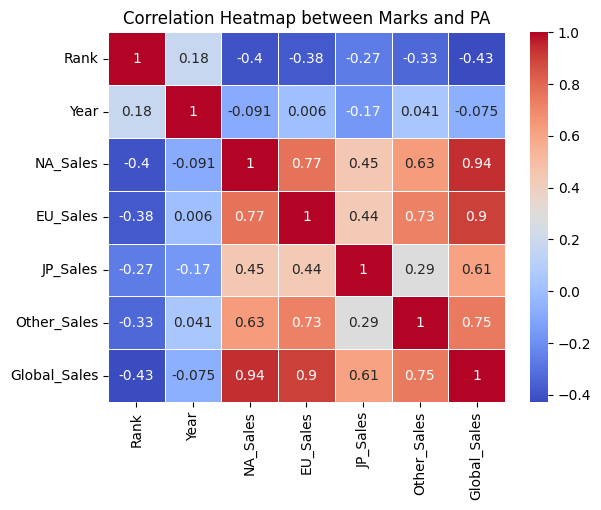

In [6]:
correlation_matrix = df[['Rank', 'Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Marks and PA')
plt.show()

In [24]:
# Extract features (X) and target variable (y)
X = df['NA_Sales'].values.reshape(-1, 1)  # Reshape to a 2D array
y = df['Global_Sales'].values

In [25]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create a linear regression model
model = LinearRegression()

In [27]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the validation set
y_pred_val = model.predict(X_val)

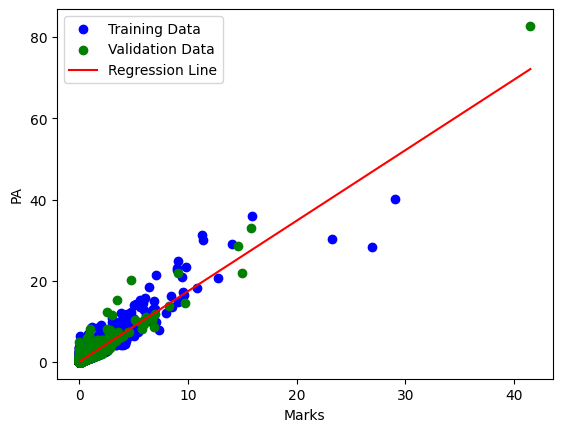

In [29]:
# Plot the training data, validation data, and the regression line
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_val, y_val, label='Validation Data', color='green')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Marks')
plt.ylabel('PA')
plt.legend()
plt.show()

In [30]:
# Print the slope (coefficient) and intercept of the regression line
print(f'Slope (Coefficient): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Slope (Coefficient): 1.736227284408008
Intercept: 0.07643036181231305


In [31]:
r2_val = r2_score(y_val, y_pred_val)
print(f'R-squared score on the validation set: {r2_val:.4f}')

R-squared score on the validation set: 0.9247


In [32]:
Tdf = pd.read_csv('vgsales.csv')
Tdf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [33]:
# Extract features (X) from the test data
X_test = Tdf['NA_Sales'].values.reshape(-1, 1)

In [34]:
# Use the trained model to predict PA values for the test data
predicted_PA = model.predict(X_test)

In [35]:
# Add the predicted PA values to the test DataFrame
Tdf['Predicted_Global_Sales'] = predicted_PA

In [36]:
# Display the DataFrame with predicted PA values
Tdf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Predicted_Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,72.112500
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,50.565920
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,27.595633
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,27.422010
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,19.643712


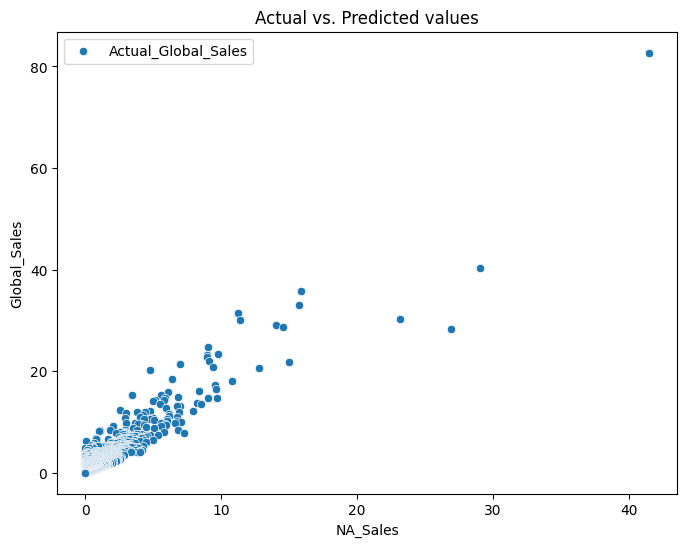

In [40]:
# Plot the actual values as data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['NA_Sales'], y=df['Global_Sales'], label='Actual_Global_Sales')

# Check if the 'Predicted_Global_Sales' column exists in the DataFrame
if 'Predicted_Global_Sales' in df.columns:
    # Plot the predicted values as a line
    sns.lineplot(x=df['NA_Sales'], y=df['Predicted_Global_Sales'], color='red', label='Predicted_Global_Sales')

plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()